<a href="https://colab.research.google.com/github/kresnaj/machinelearning-endproject-dicodingcourse/blob/google-colab/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Joshua%20Kresna%20Kusmono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [14]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

In [5]:
df = pd.read_csv('Hasil_Clustering_Transaksi_Bank.csv')

# **3. Data Splitting**

Menginisialisasi TfidfVectorizer untuk mengubah dari kategorikal menjadi nilai numerik.

In [36]:
X = df[['TransactionAmount', 'TransactionType', 'Location', 'CustomerAge', 'AccountBalance', 'Channel']]
y= df['Cluster']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Data yang ditraining:", len(X_train), "\nData yang ditest:", len(X_test))

Data yang ditraining: 2009 
Data yang ditest: 503


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [38]:
SVC_model = SVC()
RandomForest_model = RandomForestClassifier()

SVC_model.fit(X_train, y_train)
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier()

Saya menggunakan dua model sebagai pembanding nantinya. Untuk model yang saya pakai yaitu pertama SVC dan kedua Random Forest. Karena dalam dataset terdapat tiga sentimen user negative, neutral, dan positive, maka menurut saya dua model ini cocok untuk kebutuhan klasifikasi sentimen user terhadap youtube. Pada Dataset menggunakan tipe data objek, yang mana scikit-learn terutama di bagian Klasifikasi hanya bisa menerima nilai numeric. Maka saya menggunakan tfidfVectorized (menjadikan numeric berdasarkan kepentingan kata seperti suka/tidak suka), karena target saya adalah mengelompokkan sentimen user terhadap youtube.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [44]:
predict_with_SVC = SVC_model.predict(X_test)
predict_with_FR = RandomForest_model.predict(X_test)

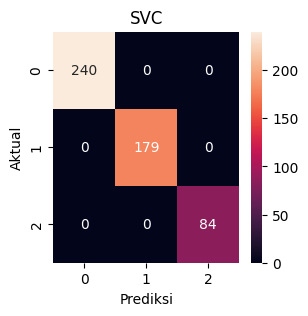

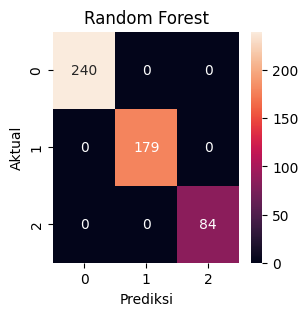

In [45]:
def evaluate_score(model, X_test, y_test, model_name):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  conix = confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(3,3))
  sb.heatmap(conix, annot=True, fmt='d')
  plt.title(model_name)
  plt.ylabel('Aktual')
  plt.xlabel('Prediksi')
  plt.show()
  results = {
      'Confusion Matrix': conix,
      'Akurasi Latihan': train_accuracy,
      'Akurasi Tes': test_accuracy,
      'Overfitting Gap': train_accuracy - test_accuracy,
      'Presisi': precision_score(y_test, y_test_pred, average='weighted'),
      'Recall': recall_score(y_test, y_test_pred, average='weighted'),
      'Skor F1': f1_score(y_test, y_test_pred, average='weighted')
  }
  return results


model_selection = {
  'SVC': evaluate_score(SVC_model, X_test, y_test, 'SVC'),
  'Random Forest': evaluate_score(RandomForest_model, X_test, y_test, 'Random Forest')
}

Untuk hasil Skoring

In [48]:
summary_score_df = pd.DataFrame(columns=['Model', 'Akurasi Latihan', 'Akurasi Tes', 'Overfitting Gap', 'Presisi', 'Recall', 'Skor F1'])

rows = []
for model_name, metrics in model_selection.items():
    rows.append({
        'Model': model_name,
        'Akurasi Latihan': metrics['Akurasi Latihan'],
        'Akurasi Tes': metrics['Akurasi Tes'],
        'Overfitting Gap': metrics['Overfitting Gap'],
        'Presisi': metrics['Presisi'],
        'Recall': metrics['Recall'],
        'Skor F1': metrics['Skor F1']
    })


summary_score_df = pd.DataFrame(rows)
print(summary_score_df)

           Model  Akurasi Latihan  Akurasi Tes  Overfitting Gap  Presisi  \
0            SVC         0.998507          1.0        -0.001493      1.0   
1  Random Forest         1.000000          1.0         0.000000      1.0   

   Recall  Skor F1  
0     1.0      1.0  
1     1.0      1.0  


Dari hasil ini, dari awal model SVC dan Random Forest dengan sangat mudah memprediksi kelompok. Mendapatkan skor 100% hampir semua seperti Akurasi Tes, Presisi, Recall, dan Skor F1. Hal ini bisa terjadi, karena data hanya berisi 2500 baris dan data yang saya berikan sudah bagus, yang mengakibatkan model sudah langsung membaca pola.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [50]:
param_randomized_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}


param_randomized_rf = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [10, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

random_search_svc = RandomizedSearchCV(SVC_model, param_randomized_svc, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search_rf = RandomizedSearchCV(RandomForest_model, param_randomized_rf, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)

random_search_svc.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)

print("Hasil parameter terbaik SVC:", random_search_svc.best_params_)
print("Skor terbaik SVC:", random_search_svc.best_score_)
print("\n")
print("Hasil parameter terbaik Random Forest:", random_search_rf.best_params_)
print("Skor terbaik Random Forest:", random_search_rf.best_score_)

Hasil parameter terbaik SVC: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': None, 'C': 100}
Skor terbaik SVC: 0.9985074626865671


Hasil parameter terbaik Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'class_weight': None}
Skor terbaik Random Forest: 0.9990049751243781


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [51]:
svc_tuned = random_search_svc.best_estimator_
rf_tuned = random_search_rf.best_estimator_

y_pred_svc = svc_tuned.predict(X_test)
y_pred_rf = rf_tuned.predict(X_test)

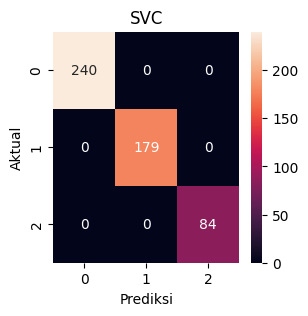

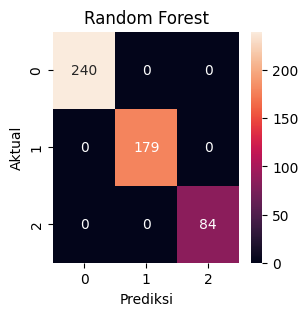

In [52]:
def evaluate_score_tuning(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    conix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(3,3))
    sb.heatmap(conix, annot=True, fmt='d')
    plt.title(model_name)
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()
    results = {
        'Confusion Matrix': conix,
        'Akurasi Latihan': train_accuracy,
        'Akurasi Tes': test_accuracy,
        'Overfitting Gap': train_accuracy - test_accuracy,
        'Presisi': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Skor F1': f1_score(y_test, y_test_pred, average='weighted')
    }
    return results

model_selection = {
    'SVC': evaluate_score_tuning(svc_tuned, X_train, y_train, X_test, y_test, 'SVC'),
    'Random Forest': evaluate_score_tuning(rf_tuned, X_train, y_train, X_test, y_test, 'Random Forest')
}

Scoring Model

In [54]:
summary_score_df = pd.DataFrame(columns=['Model', 'Akurasi Latihan', 'Akurasi Tes', 'Overfitting Gap', 'Presisi', 'Recall', 'Skor F1'])

rows = []
for model_name, metrics in model_selection.items():
    rows.append({
        'Model': model_name,
        'Akurasi Latihan': metrics['Akurasi Latihan'],
        'Akurasi Tes': metrics['Akurasi Tes'],
        'Overfitting Gap': metrics['Overfitting Gap'],
        'Presisi': metrics['Presisi'],
        'Recall': metrics['Recall'],
        'Skor F1': metrics['Skor F1']
    })

summary_score_df = pd.DataFrame(rows)
print(summary_score_df)

           Model  Akurasi Latihan  Akurasi Tes  Overfitting Gap  Presisi  \
0            SVC         0.999502          1.0        -0.000498      1.0   
1  Random Forest         1.000000          1.0         0.000000      1.0   

   Recall  Skor F1  
0     1.0      1.0  
1     1.0      1.0  


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Tuning pada model SVC dan Random Forest menggunakan RandomizedCV agar proses lebih cepat dan efisien.
2. - Dari hasil, membuktikan bahwa dua tidak mengalami peningkatan atau penurunan alias Flat. Karena dari awal performa model sebelu di Tuning sudah sangat bagus, jadi tidak perlu di tuning.

  - Untuk Overfitting Gap (perhitungan dari Akurasi Latihan dikurangi Akurasi Tes). Pada model SVC mendapati skor -0.000498 yang tergolong good fit, bisa menjadi negatif karena Akurasi Latihan lebih rendah dari Akurasi Efisien. Sedangkan untuk Random Forest mendapati skor 0 yang berarti good fit.
